In [1]:
  nm,m          # data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import xgboost as xgb

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from scipy.stats import norm

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
train_df = pd.read_csv('../Titanic/train.csv')
test_df = pd.read_csv('../Titanic/test.csv')
d_f = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
    })
combine = [train_df, test_df]
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print('Train columns with null values:\n', combine[0].isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', combine[1].isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [5]:
for dataset in combine:
    dataset.drop(['Ticket'],axis=1, inplace=True)
    dataset.drop(['Cabin'], axis=1, inplace=True)
    
combine[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [6]:
for dataset in combine:
    dataset['Age'].fillna(train_df['Age'].dropna().mean(), inplace=True)

In [7]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [8]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(combine[0]['Title'], combine[0]['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [9]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [10]:
combine[0][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [11]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(train_df.Embarked.dropna().mode()[0])

In [12]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
    dataset['Title'] = dataset['Title']\
    .map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

In [13]:
for dataset in combine:
    dataset.drop(['Name'],axis=1, inplace=True)
    dataset.drop(['PassengerId'], axis=1, inplace=True)
    dataset.drop(['Parch'],axis=1, inplace=True)
    dataset.drop(['SibSp'], axis=1, inplace=True)

In [14]:
X_train = combine[0].drop("Survived", axis=1)
Y_train = combine[0]["Survived"]
X_test  = combine[1]
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


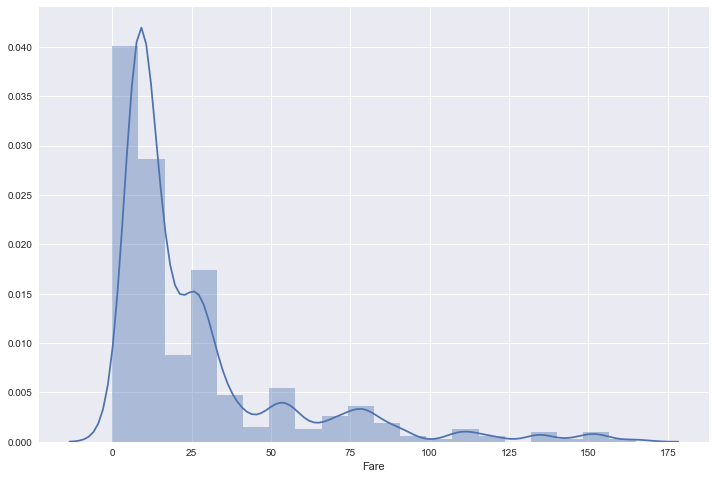

In [15]:
sns.set(color_codes=True)
sns.distplot(combine[0][combine[0]['Fare']<200]['Fare'], bins=20)

In [16]:
combine[0].Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
combine[0].Fare.isnull().sum()

0

In [18]:
#for dataset in data_cleaner:    
 #   dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
  #  dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
   # dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    #dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    #dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [19]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 3)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [20]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 8.662, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 26.0), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 26.0), 'Fare']  = 2

In [21]:
pd.value_counts(combine[0]['Fare'].values)

1.0    301
2.0    295
0.0    295
dtype: int64

In [22]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [23]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
combine[0].head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,FareBand,IsAlone
0,0,3,0,1.0,0.0,0,2,1,"(-0.001, 8.662]",0
1,1,1,1,2.0,2.0,1,2,3,"(26.0, 512.329]",0
2,1,3,1,1.0,0.0,0,1,2,"(-0.001, 8.662]",1
3,1,1,1,2.0,2.0,0,2,3,"(26.0, 512.329]",0
4,0,3,0,2.0,0.0,0,1,1,"(-0.001, 8.662]",1


In [24]:
pd.value_counts(combine[0]['Age'].values)

1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
dtype: int64

In [25]:
combine[0] = combine[0].drop(['FareBand'], axis=1)

In [26]:
combine[0].shape,combine[1].shape

((891, 9), (418, 8))

In [27]:
for dataset in combine:
    dataset.drop(['FamilySize'],axis=1,inplace=True)

In [28]:
y = combine[0]['Survived']

In [29]:
combine[0].drop(['Survived'],axis=1,inplace=True)

In [30]:
lm = XGBClassifier(
    max_depth = 15,
    n_estimators=1000,
    learning_rate=0.05,
    gamma=.4,
    nthread=8,
    subsample=1,
    colsample_bytree=0.8,
    num_round = 44,
    min_child_weight = 1,
    seed=0)

In [71]:
total=0
for i in range (1,11):
    X_train, X_test, y_train, y_test = train_test_split(combine[0], y, test_size=0.2)
    model = lm.fit(X_train, y_train)
    acc_log = round(model.score(X_test, y_test) * 100, 2)
    print (acc_log)
    total+=acc_log
print (total/10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


81.56


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


81.56


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


79.33


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


82.12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


84.36


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


84.36


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


82.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


83.24


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


82.12
83.24
82.45700000000001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [73]:
X_train = combine[0]
Y_train = y
X_test  = combine[1]
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [75]:
model.fit(X_train, Y_train)
acc_log = round(model.score(X_train, Y_train) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


85.41

In [81]:
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [86]:
submission = pd.DataFrame({
        "PassengerId": d_f["PassengerId"],
        "Survived": y_pred
    })

In [89]:
submission.to_csv('submission',index = False)